In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [256]:
all_data_df = pd.read_csv("policy_databox/full_data.csv")

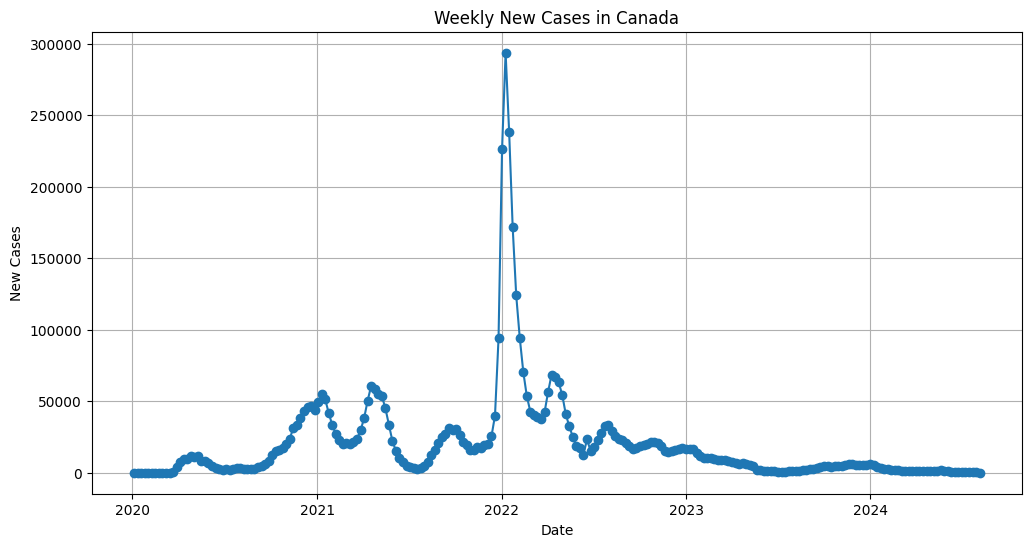

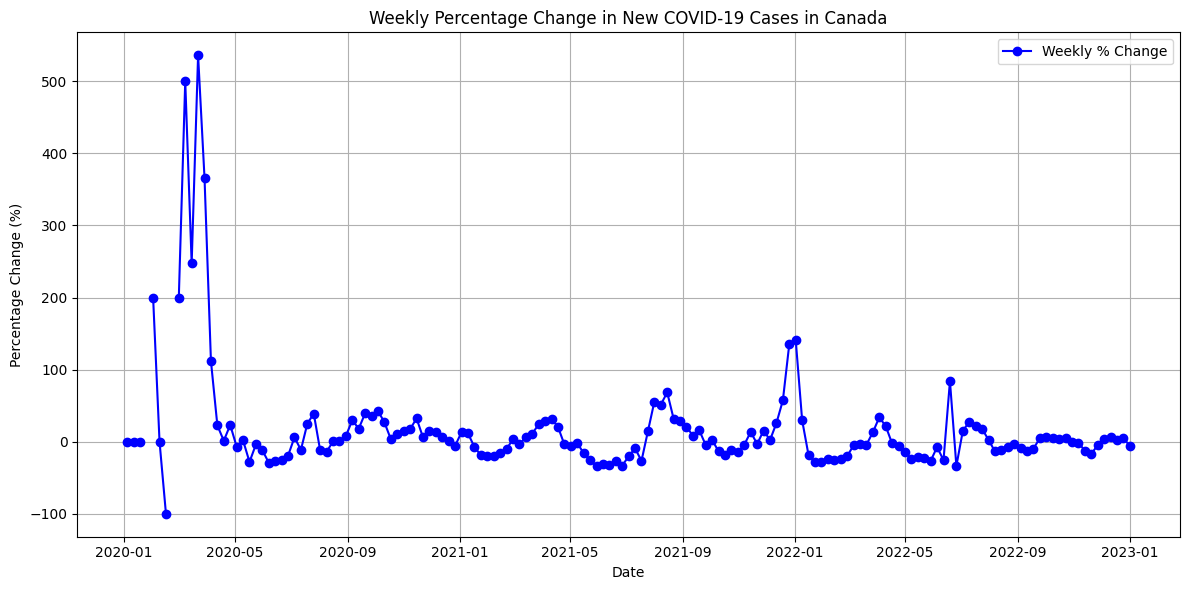

In [257]:
CANADA_POPULATION = 41000000
canada_data_df = all_data_df[all_data_df["location"] == "Canada"]
canada_data_df.reset_index(drop=True, inplace=True)
canada_data_df["new_cases_cleaned"] = canada_data_df["new_cases"].replace(0, np.nan)
canada_data_df["date"] = pd.to_datetime(canada_data_df["date"])
canada_data_df.set_index("date", inplace=True)
weekly_canada_data = canada_data_df["new_cases_cleaned"].resample("W").sum()
weekly_canada_data = weekly_canada_data.reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_canada_data["date"], weekly_canada_data["new_cases_cleaned"], marker="o")
plt.title("Weekly New Cases in Canada")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

weekly_canada_data["pct_change"] = weekly_canada_data["new_cases_cleaned"].pct_change() * 100
weekly_canada_data["pct_change"].fillna(0, inplace=True)  # Replace NaN with 0 for the first entry

canada_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_CAN_v1.csv")
canada_policy_df = canada_policy_df[canada_policy_df["Jurisdiction"] == "NAT_TOTAL"]
canada_policy_df["date"] = pd.to_datetime(canada_policy_df["Date"], format="%Y%m%d")
canada_policy_df.reset_index(drop=True, inplace=True)
# Define the list of policy index columns you want to select
policy_index_columns = [
    "C1E_School closing",
    "C2E_Workplace closing",
    "C3E_Cancel public events",
    "C4E_Restrictions on gatherings",
    "C5E_Close public transport",
    "C6E_Stay at home requirements",
    "C7E_Restrictions on internal movement",
    "C8E_International travel controls",
    "E1_Income support",
    "E2_Debt/contract relief",
    "E3_Fiscal measures",
    "E4_International support",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H4_Emergency investment in healthcare",
    "H5_Investment in vaccines",
    "H6E_Facial Coverings",
    "H7_Vaccination policy",
    "H8E_Protection of elderly people",
    "V1_Vaccine Prioritisation (summary)",
    "V2A_Vaccine Availability (summary)",
    "V2D_Medically/ clinically vulnerable (Non-elderly)",
    "V2E_Education",
    "V2F_Frontline workers  (non healthcare)",
    "V2G_Frontline workers  (healthcare)",
    "V3_Vaccine Financial Support (summary)",
    "V4_Mandatory Vaccination (summary)",
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]
# Include the 'date' column for merging or time series analysis
columns_to_select = ["date"] + policy_index_columns
# Select only these columns from the policy DataFrame
canada_policy_df = canada_policy_df[columns_to_select]

canada_policy_weekly = canada_policy_df.set_index("date").resample("W").mean().reset_index()
canada_weekly_merged_df = pd.merge(weekly_canada_data, canada_policy_weekly, on="date")
canada_policy_df.head()

# Calculate weekly changes in policy indices
policy_index_columns = [
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]

for col in policy_index_columns:
    canada_weekly_merged_df[f"{col}_change"] = canada_weekly_merged_df[col].diff()
# Assuming 'canada_weekly_data' is your DataFrame and has 'date' and 'pct_change' columns

plt.figure(figsize=(12, 6))
plt.plot(
    canada_weekly_merged_df["date"],
    canada_weekly_merged_df["pct_change"],
    marker="o",
    linestyle="-",
    color="blue",
    label="Weekly % Change",
)
plt.xlabel("Date")
plt.ylabel("Percentage Change (%)")
plt.title("Weekly Percentage Change in New COVID-19 Cases in Canada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [258]:
US_POPULATION = 346000000
us_data_df = all_data_df[all_data_df["location"] == "United States"]
us_data_df.reset_index(drop=True, inplace=True)
us_data_df["new_cases_cleaned"] = us_data_df["new_cases"].replace(0, np.nan)
us_data_df["date"] = pd.to_datetime(us_data_df["date"])
us_data_df.set_index("date", inplace=True)
us_weekly_data = us_data_df["new_cases_cleaned"].resample("W").sum()
us_weekly_data = us_weekly_data.reset_index()

us_weekly_data["pct_change"] = us_weekly_data["new_cases_cleaned"].pct_change() * 100
us_weekly_data["pct_change"].fillna(0, inplace=True)  # Replace NaN with 0 for the first entry

us_policy_df = pd.read_csv("policy_databox/OxCGRT_fullwithnotes_USA_v1.csv")
us_policy_df = us_policy_df[us_policy_df["Jurisdiction"] == "NAT_TOTAL"]
us_policy_df["date"] = pd.to_datetime(us_policy_df["Date"], format="%Y%m%d")
us_policy_df.reset_index(drop=True, inplace=True)
# Define the list of policy index columns you want to select
policy_index_columns = [
    "C1E_School closing",
    "C2E_Workplace closing",
    "C3E_Cancel public events",
    "C4E_Restrictions on gatherings",
    "C5E_Close public transport",
    "C6E_Stay at home requirements",
    "C7E_Restrictions on internal movement",
    "C8E_International travel controls",
    "E1_Income support",
    "E2_Debt/contract relief",
    "E3_Fiscal measures",
    "E4_International support",
    "H1_Public information campaigns",
    "H2_Testing policy",
    "H3_Contact tracing",
    "H4_Emergency investment in healthcare",
    "H5_Investment in vaccines",
    "H6E_Facial Coverings",
    "H7_Vaccination policy",
    "H8E_Protection of elderly people",
    "V1_Vaccine Prioritisation (summary)",
    "V2A_Vaccine Availability (summary)",
    "V2D_Medically/ clinically vulnerable (Non-elderly)",
    "V2E_Education",
    "V2F_Frontline workers  (non healthcare)",
    "V2G_Frontline workers  (healthcare)",
    "V3_Vaccine Financial Support (summary)",
    "V4_Mandatory Vaccination (summary)",
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]
# Include the 'date' column for merging or time series analysis
columns_to_select = ["date"] + policy_index_columns
# Select only these columns from the policy DataFrame
us_policy_df = us_policy_df[columns_to_select]

us_policy_weekly = us_policy_df.set_index("date").resample("W").mean().reset_index()
us_weekly_merged_df = pd.merge(us_weekly_data, us_policy_weekly, on="date")
us_policy_df.head()

# Calculate weekly changes in policy indices
policy_index_columns = [
    "StringencyIndex_WeightedAverage",
    "GovernmentResponseIndex_WeightedAverage",
    "ContainmentHealthIndex_WeightedAverage",
    "EconomicSupportIndex",
]

for col in policy_index_columns:
    us_weekly_merged_df[f"{col}_change"] = us_weekly_merged_df[col].diff()

In [274]:
us_weekly_merged_df = us_weekly_merged_df[4:]
canada_weekly_merged_df = canada_weekly_merged_df[6:]

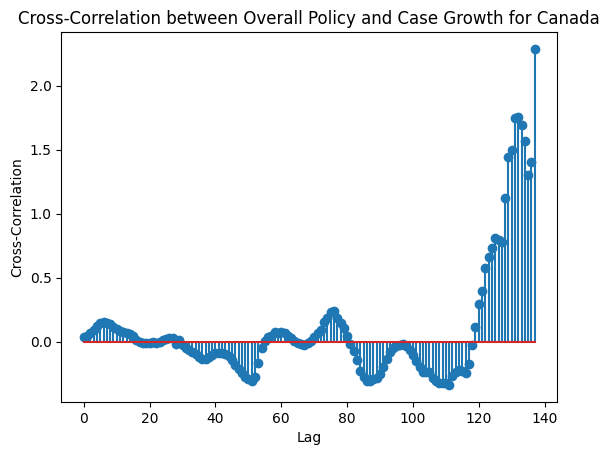

In [272]:
from statsmodels.tsa.stattools import ccf

ccf_values = ccf(
    canada_weekly_merged_df["GovernmentResponseIndex_WeightedAverage"].dropna(),
    canada_weekly_merged_df["pct_change"].dropna(),
)
lags = range(len(ccf_values))

plt.stem(lags, ccf_values)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title(f"Cross-Correlation between Overall Policy and Case Growth for Canada")
plt.show()

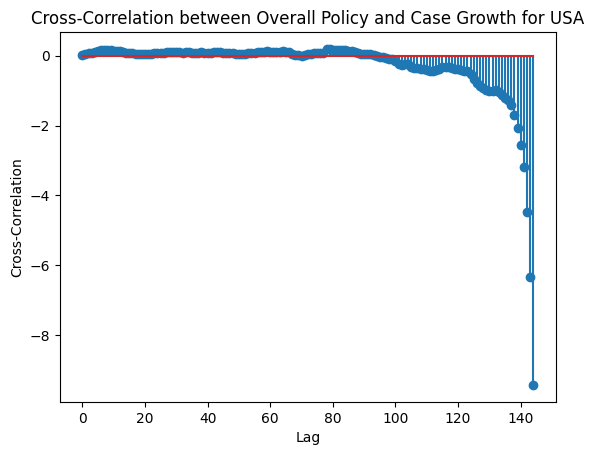

In [271]:
from statsmodels.tsa.stattools import ccf

ccf_values = ccf(
    us_weekly_merged_df["GovernmentResponseIndex_WeightedAverage"].dropna(),
    us_weekly_merged_df["pct_change"].dropna(),
)
lags = range(len(ccf_values))

plt.stem(lags, ccf_values)
plt.xlabel("Lag")
plt.ylabel("Cross-Correlation")
plt.title(f"Cross-Correlation between Overall Policy and Case Growth for USA")
plt.show()

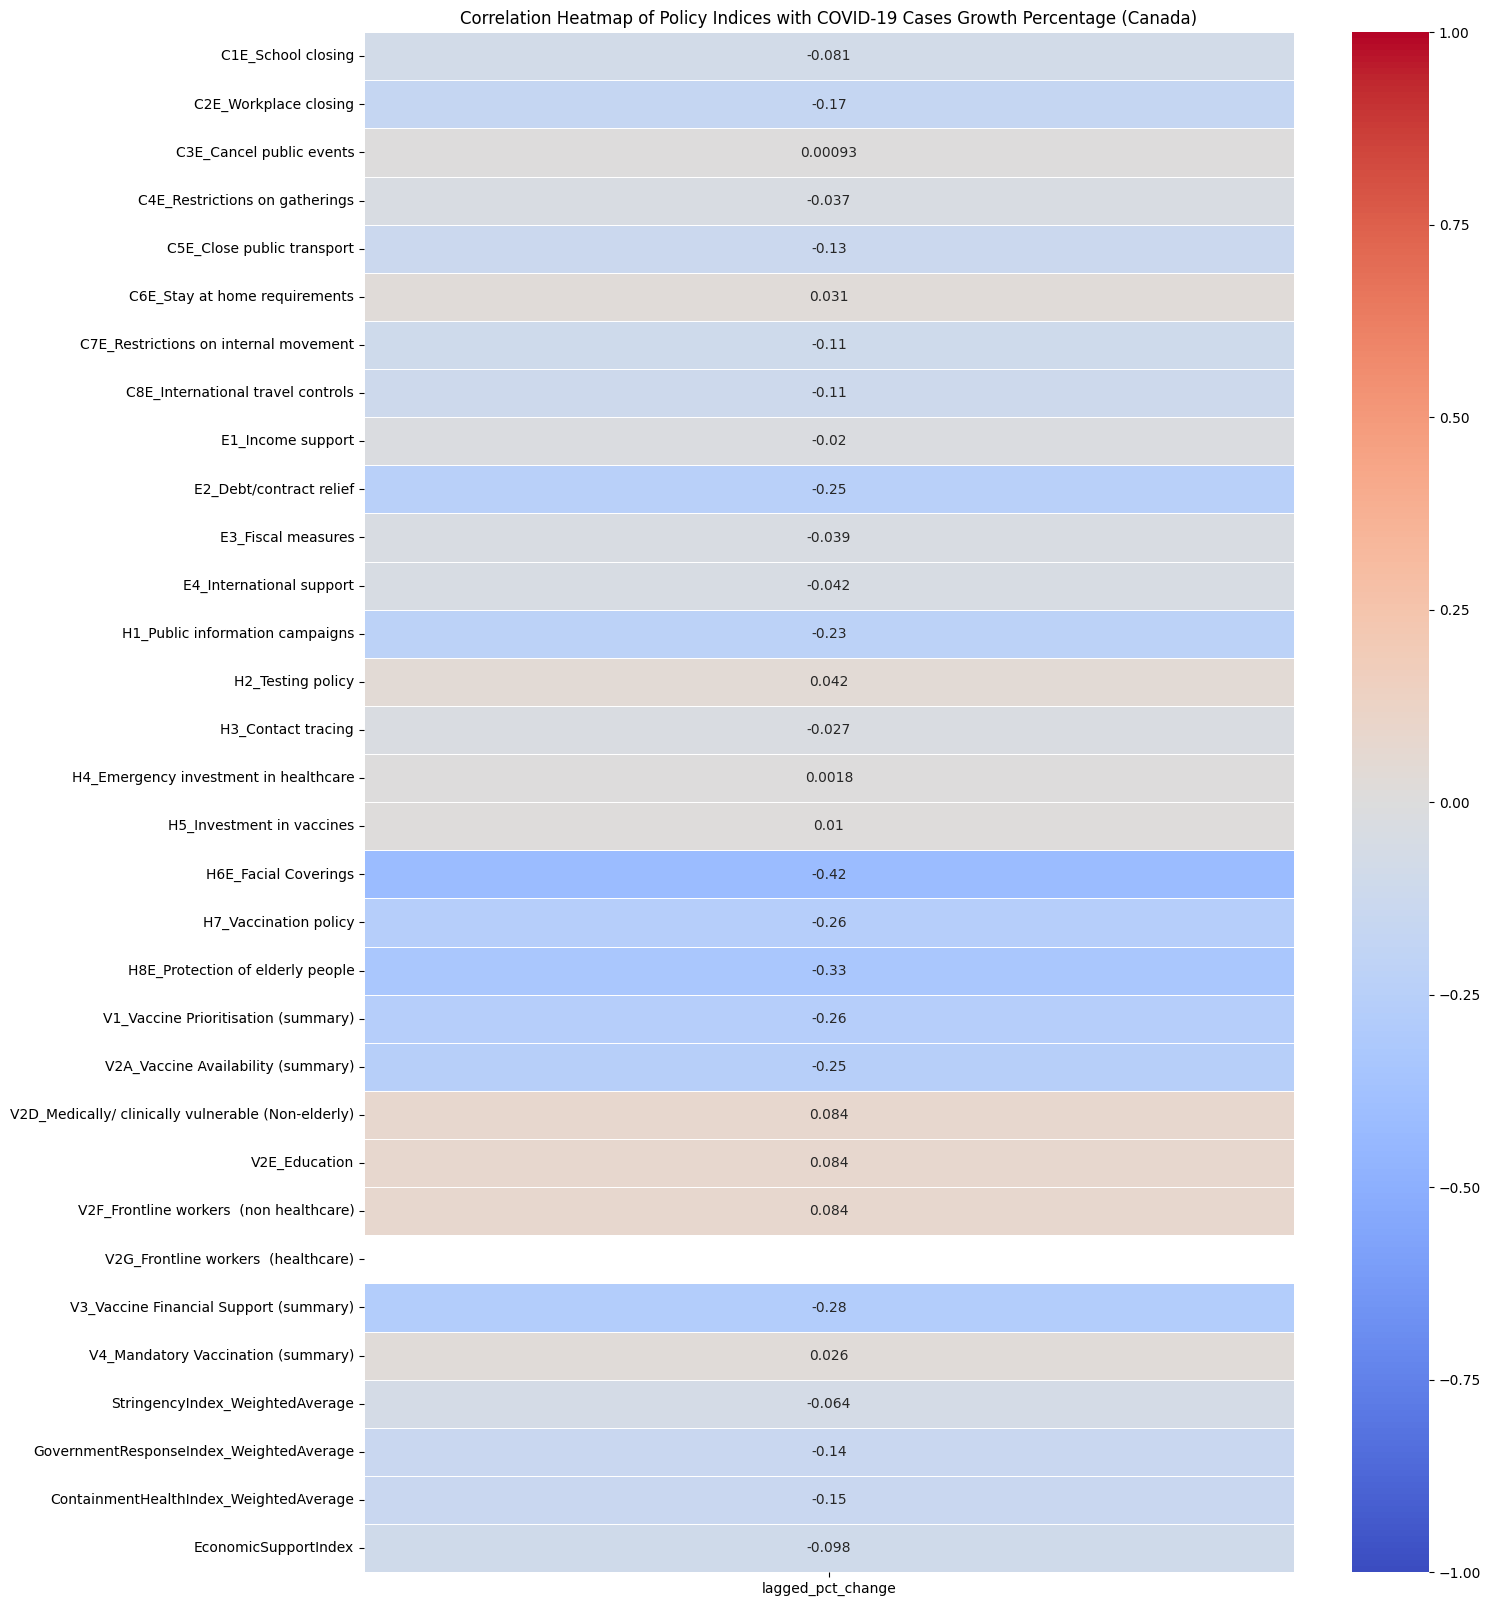

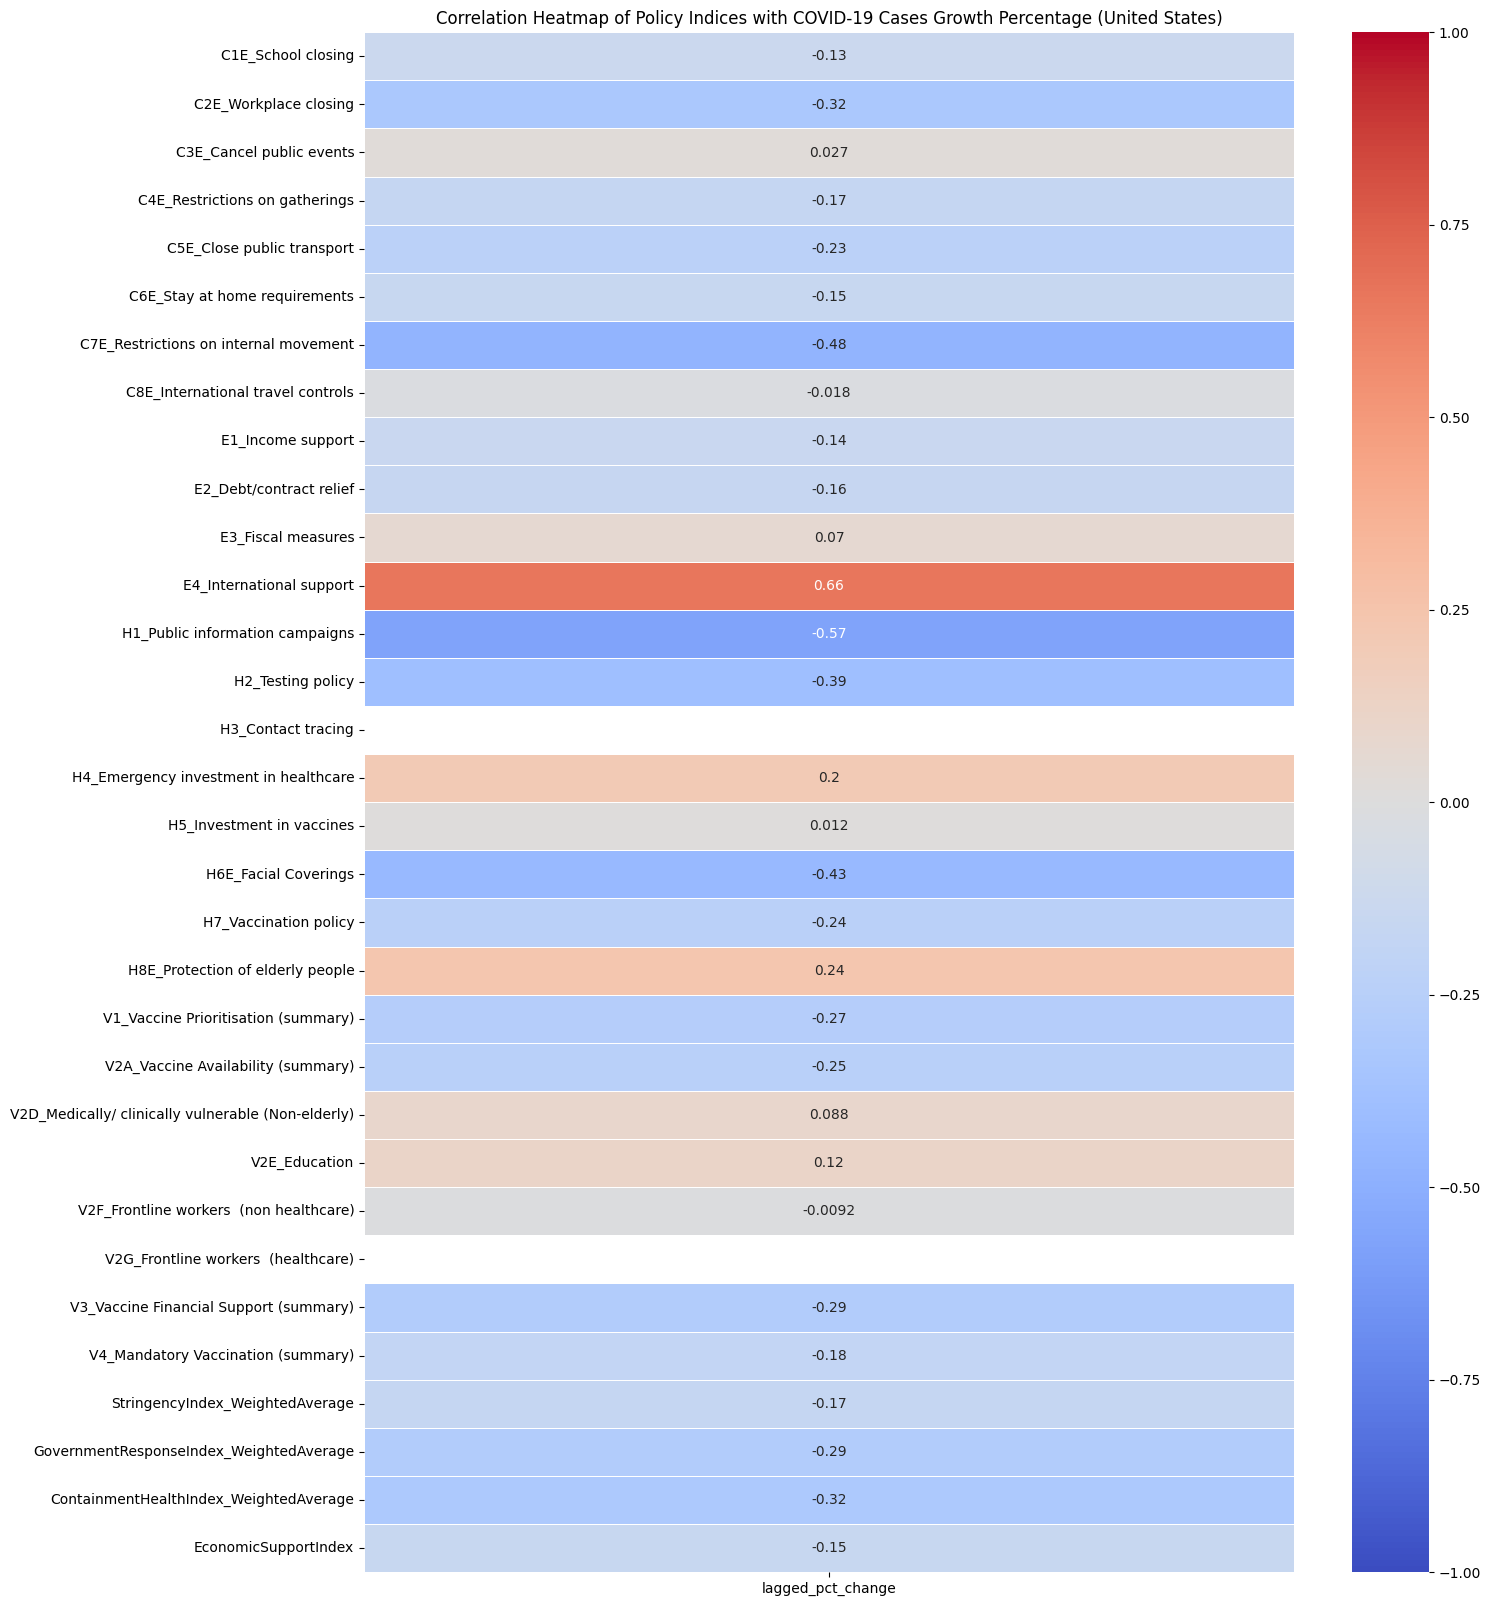

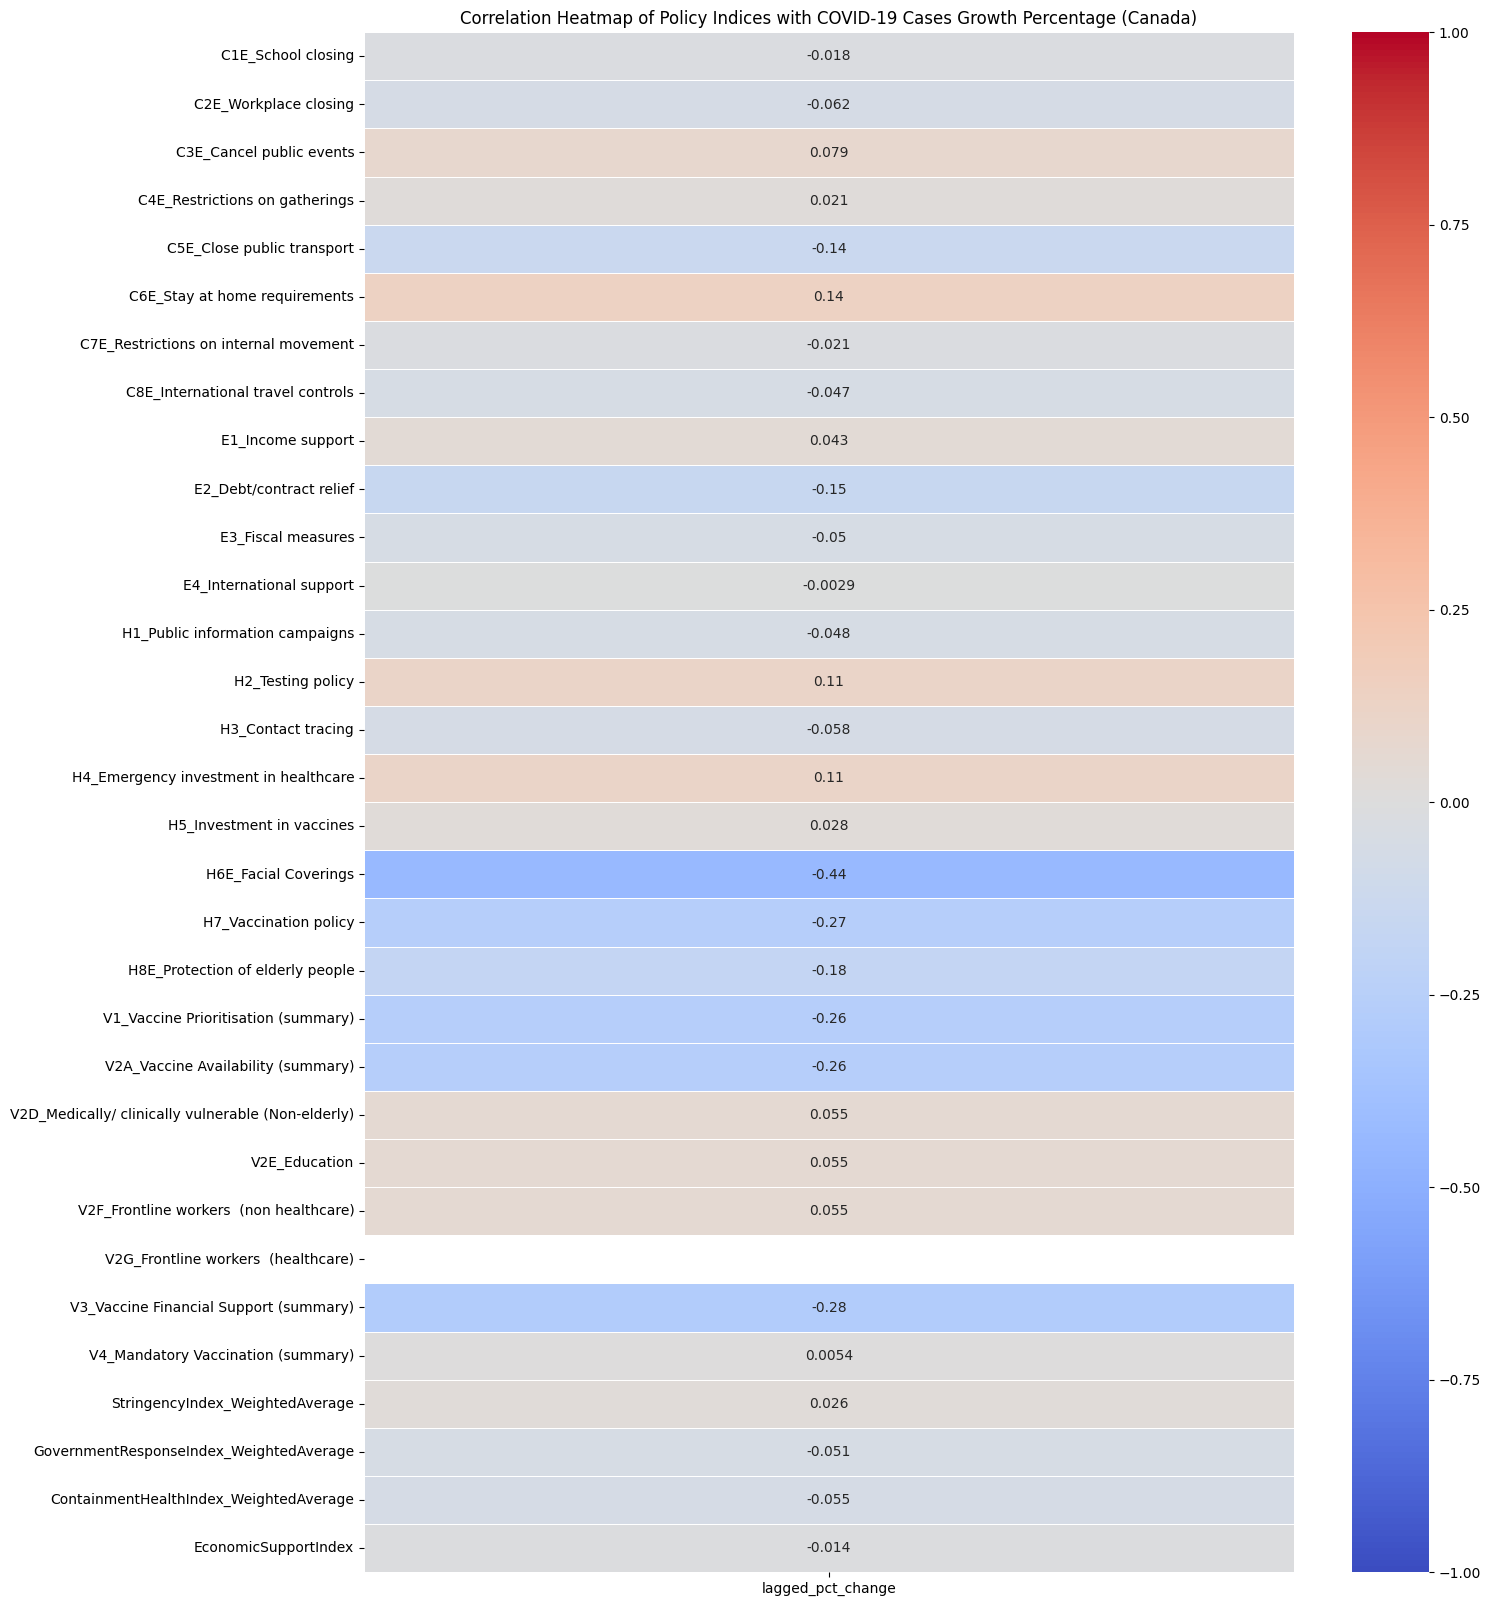

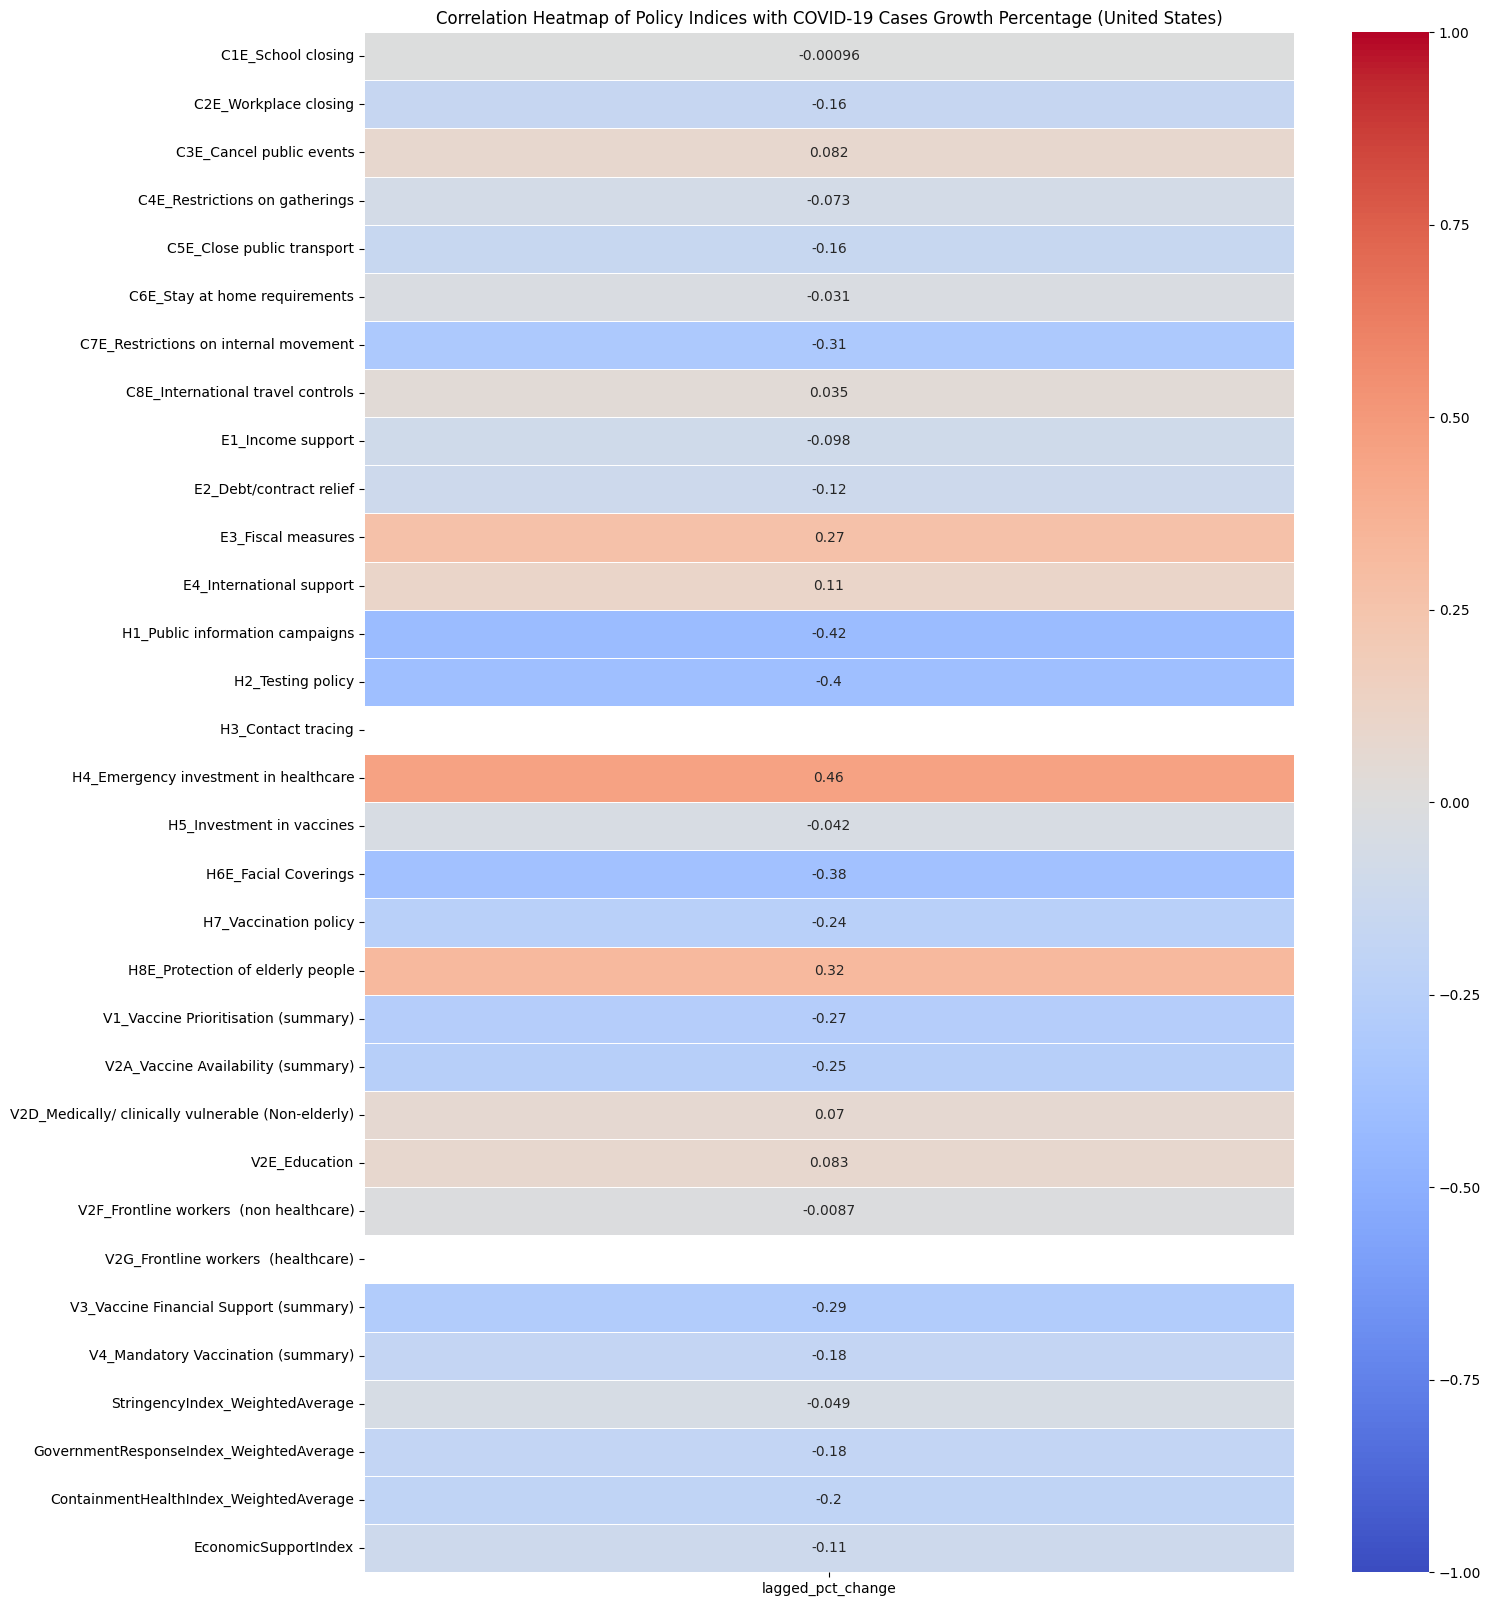

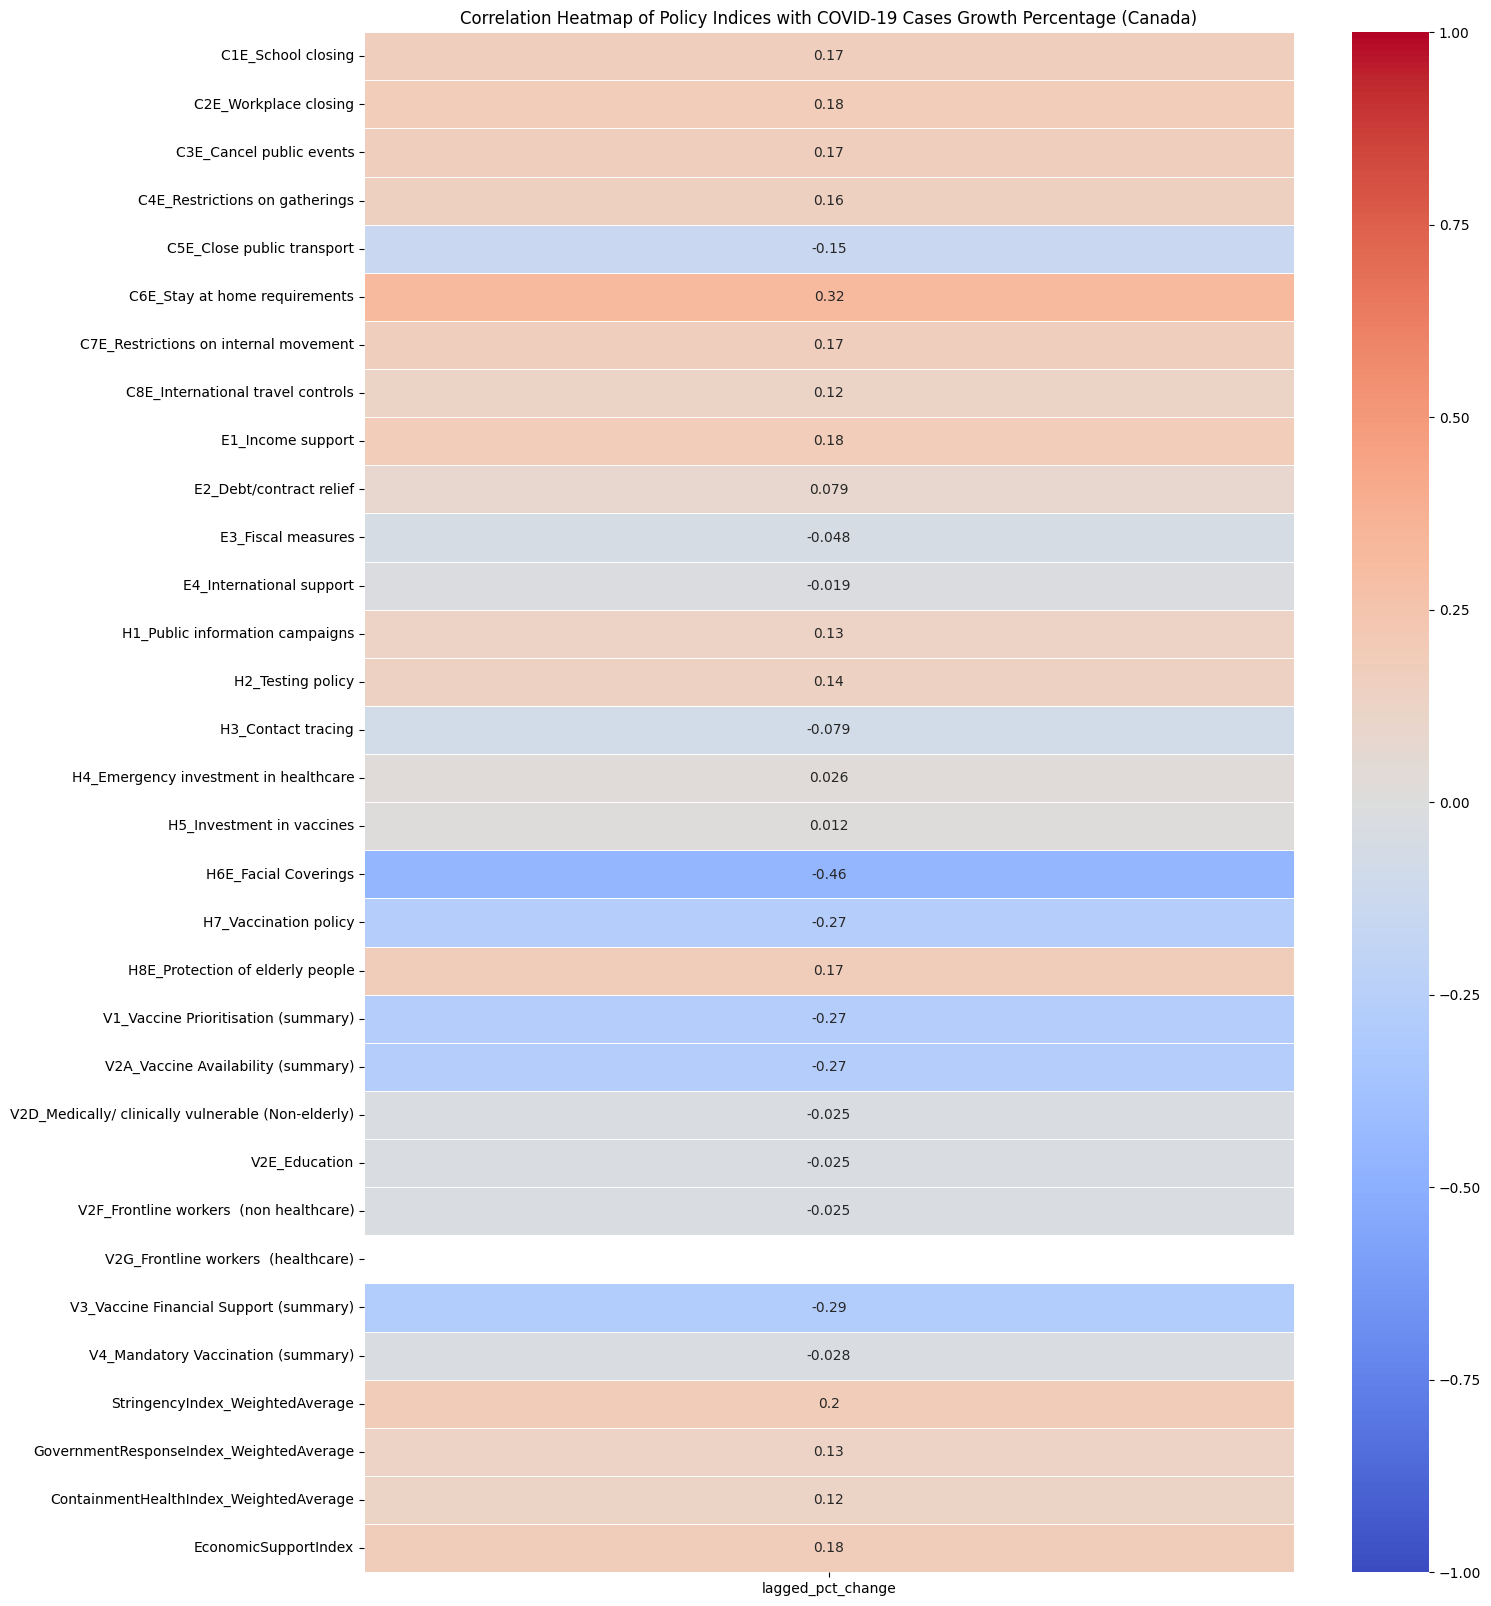

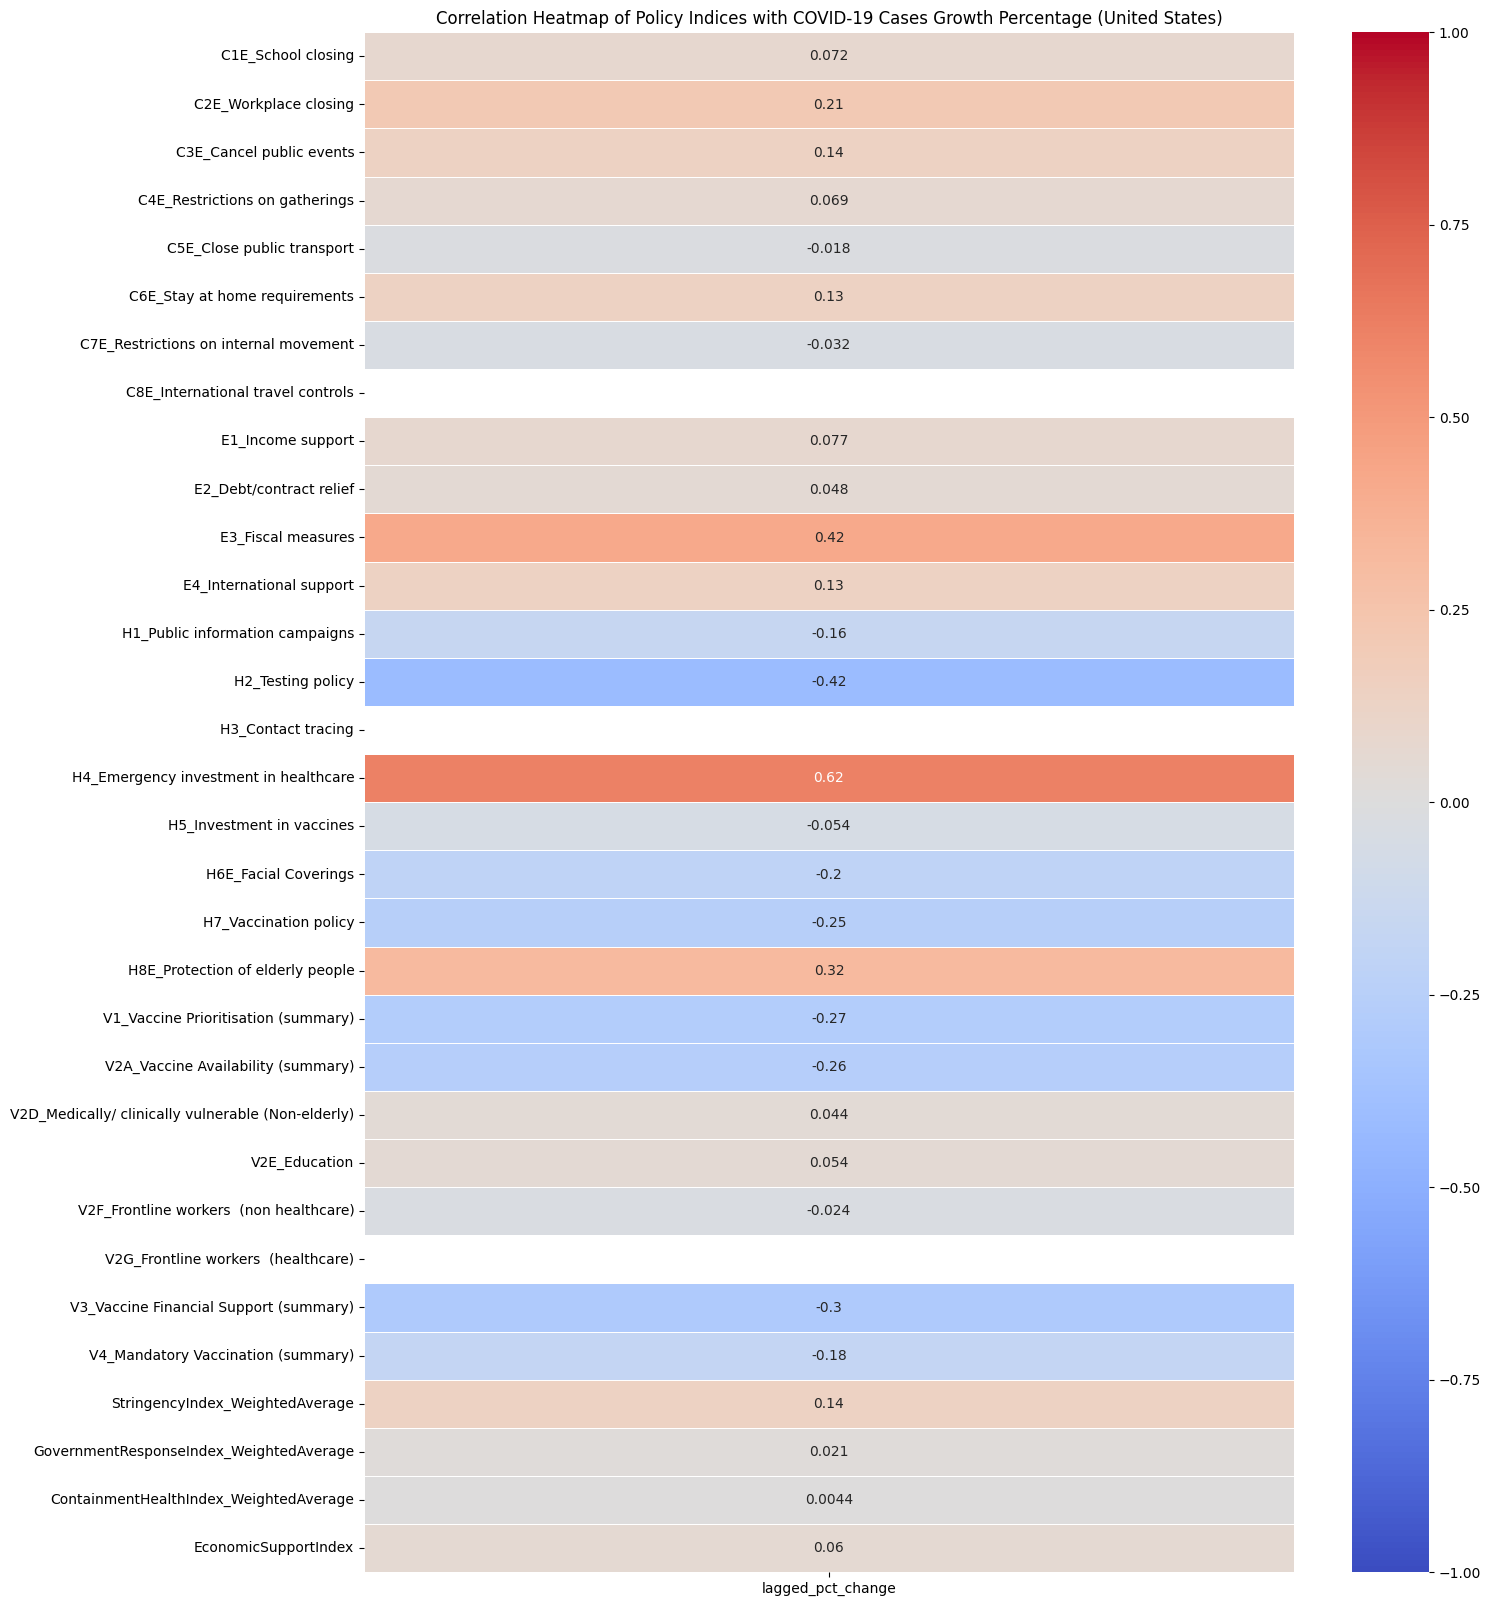

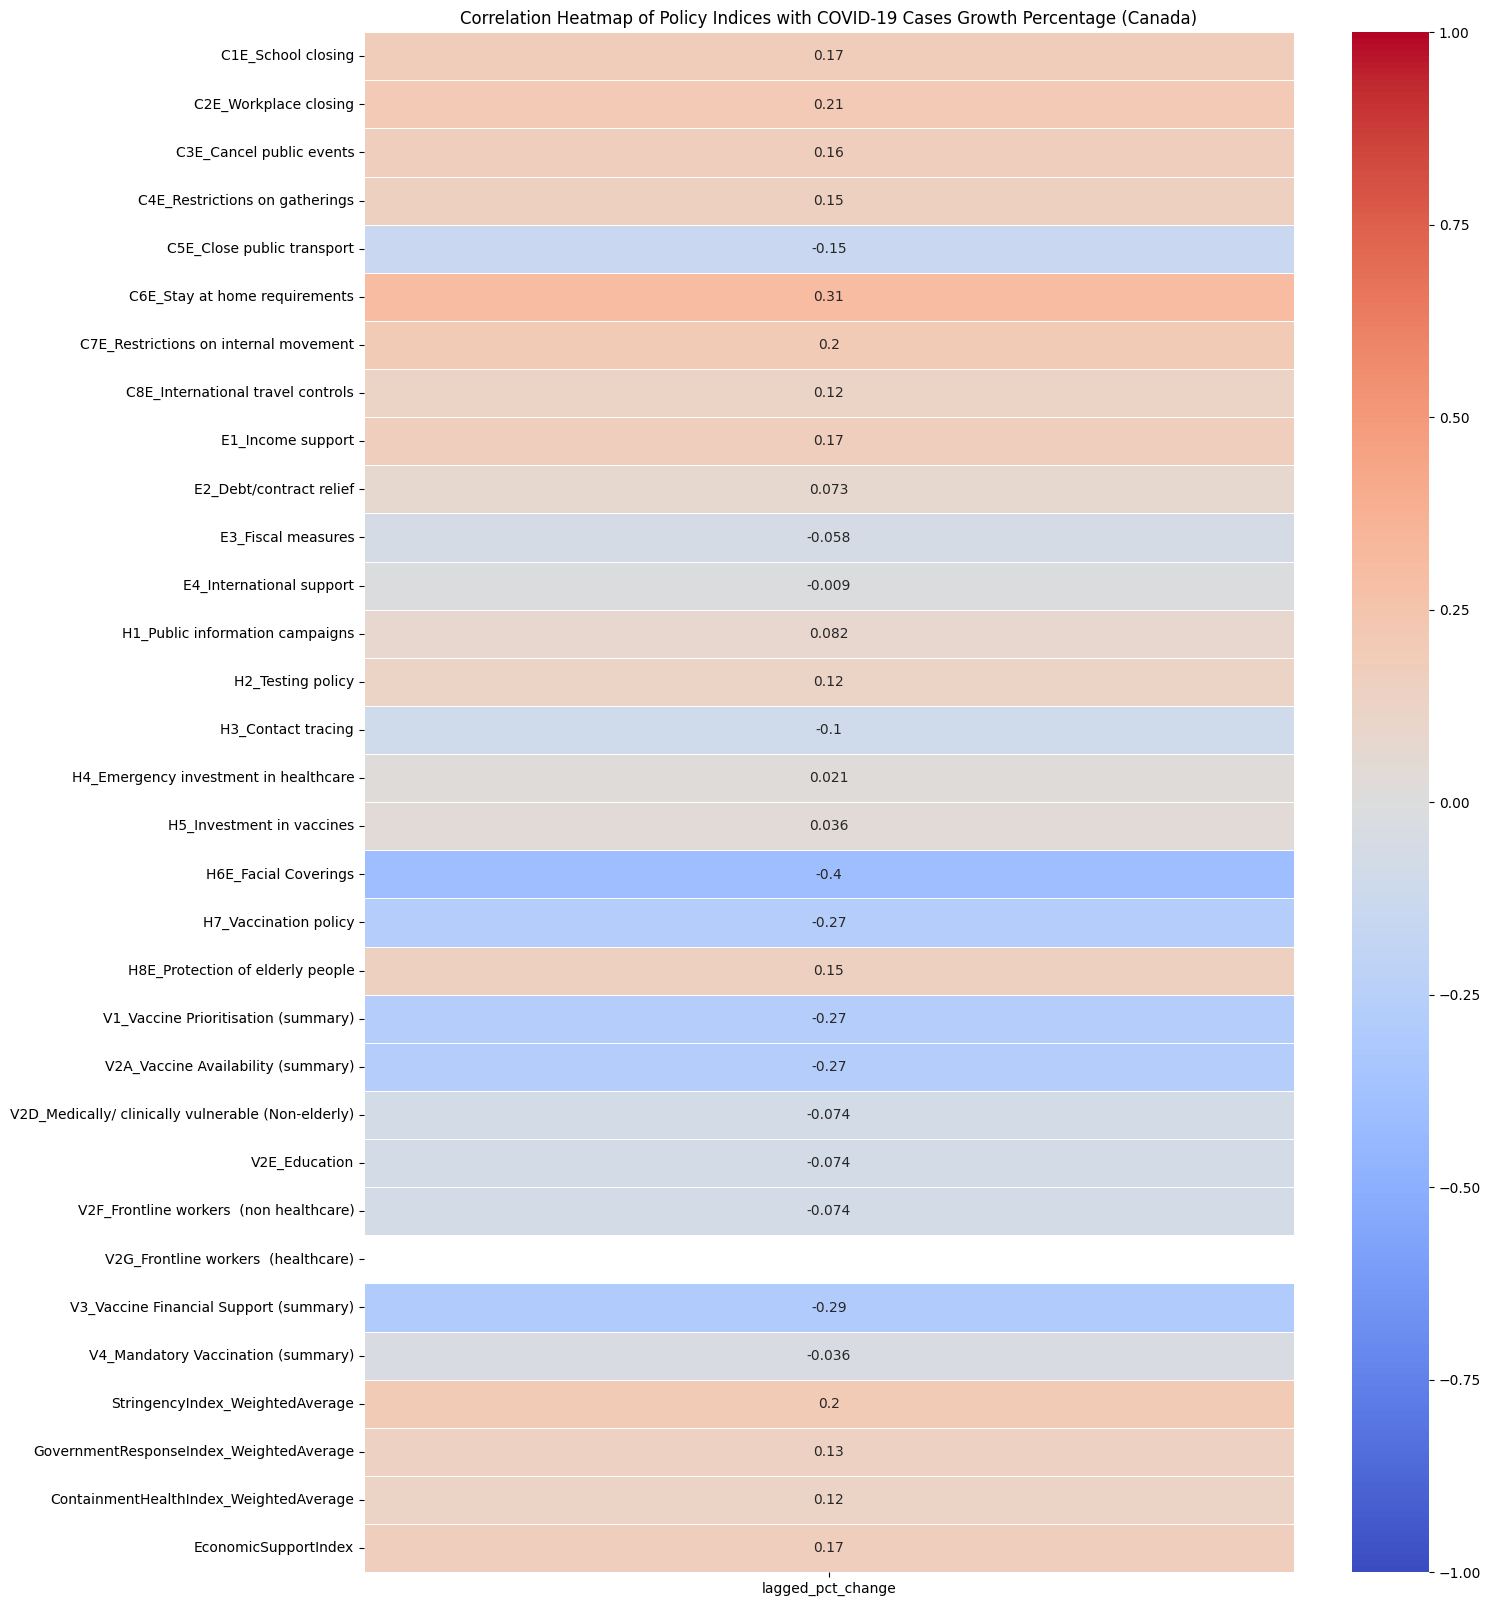

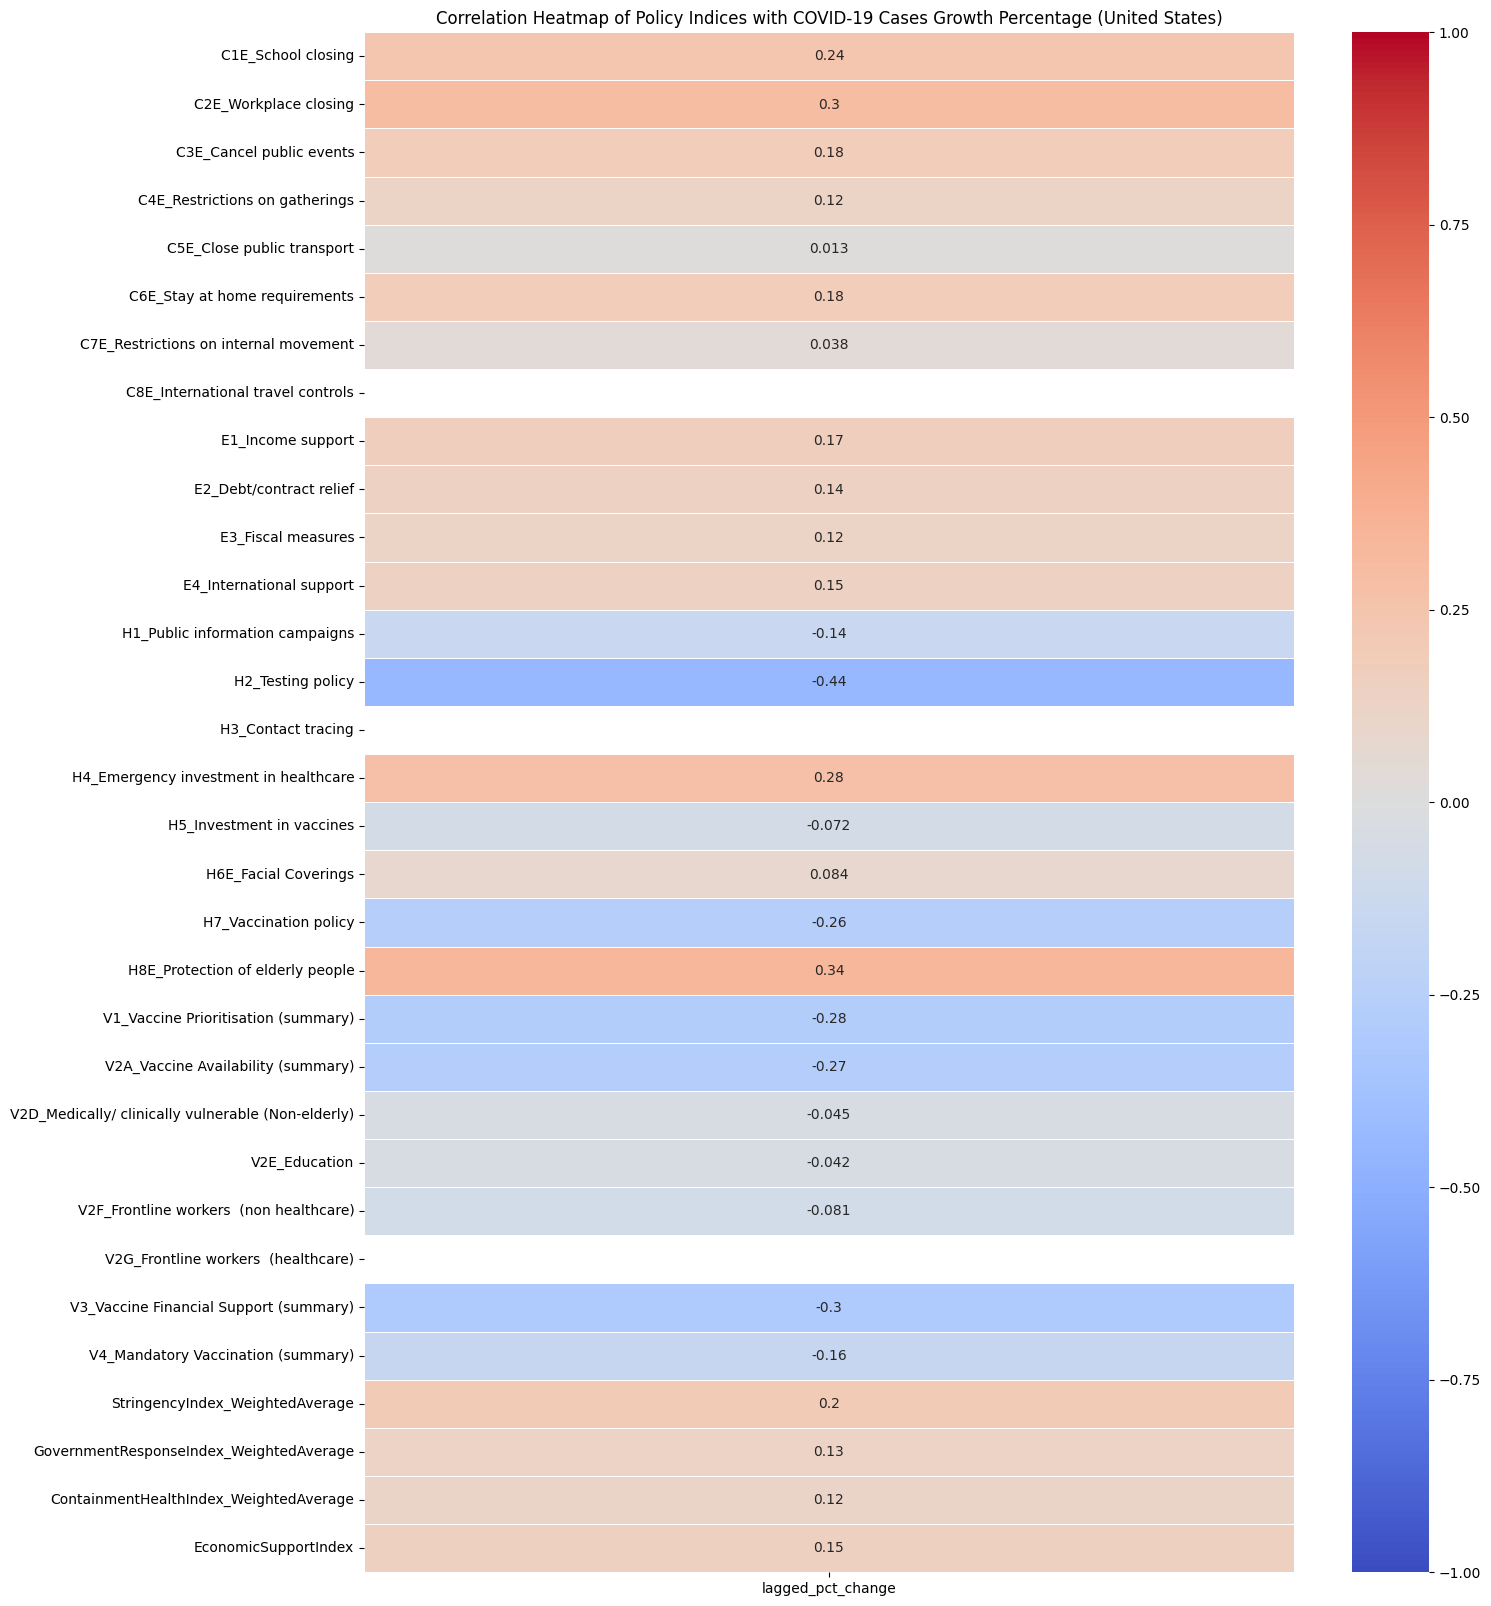

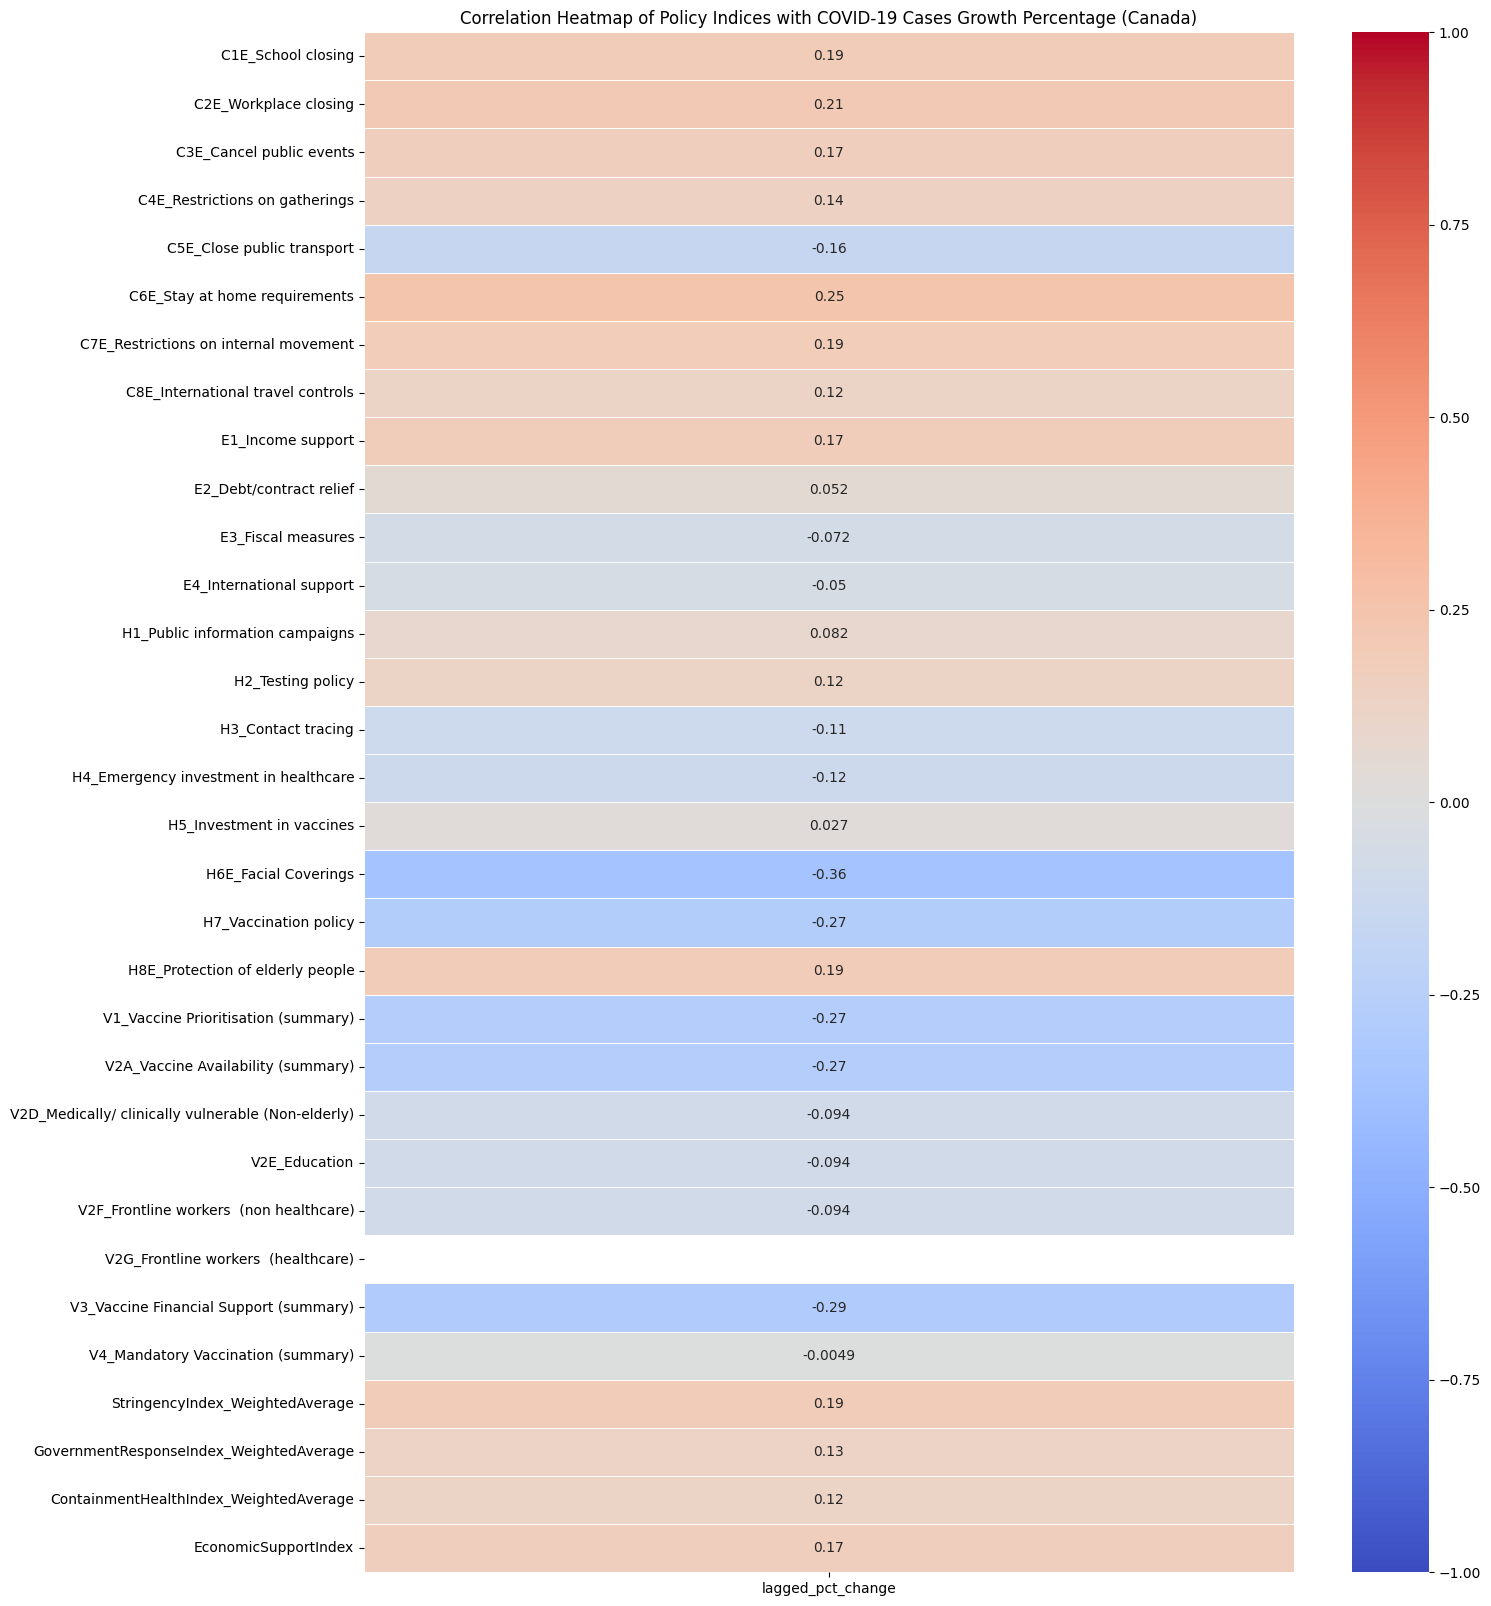

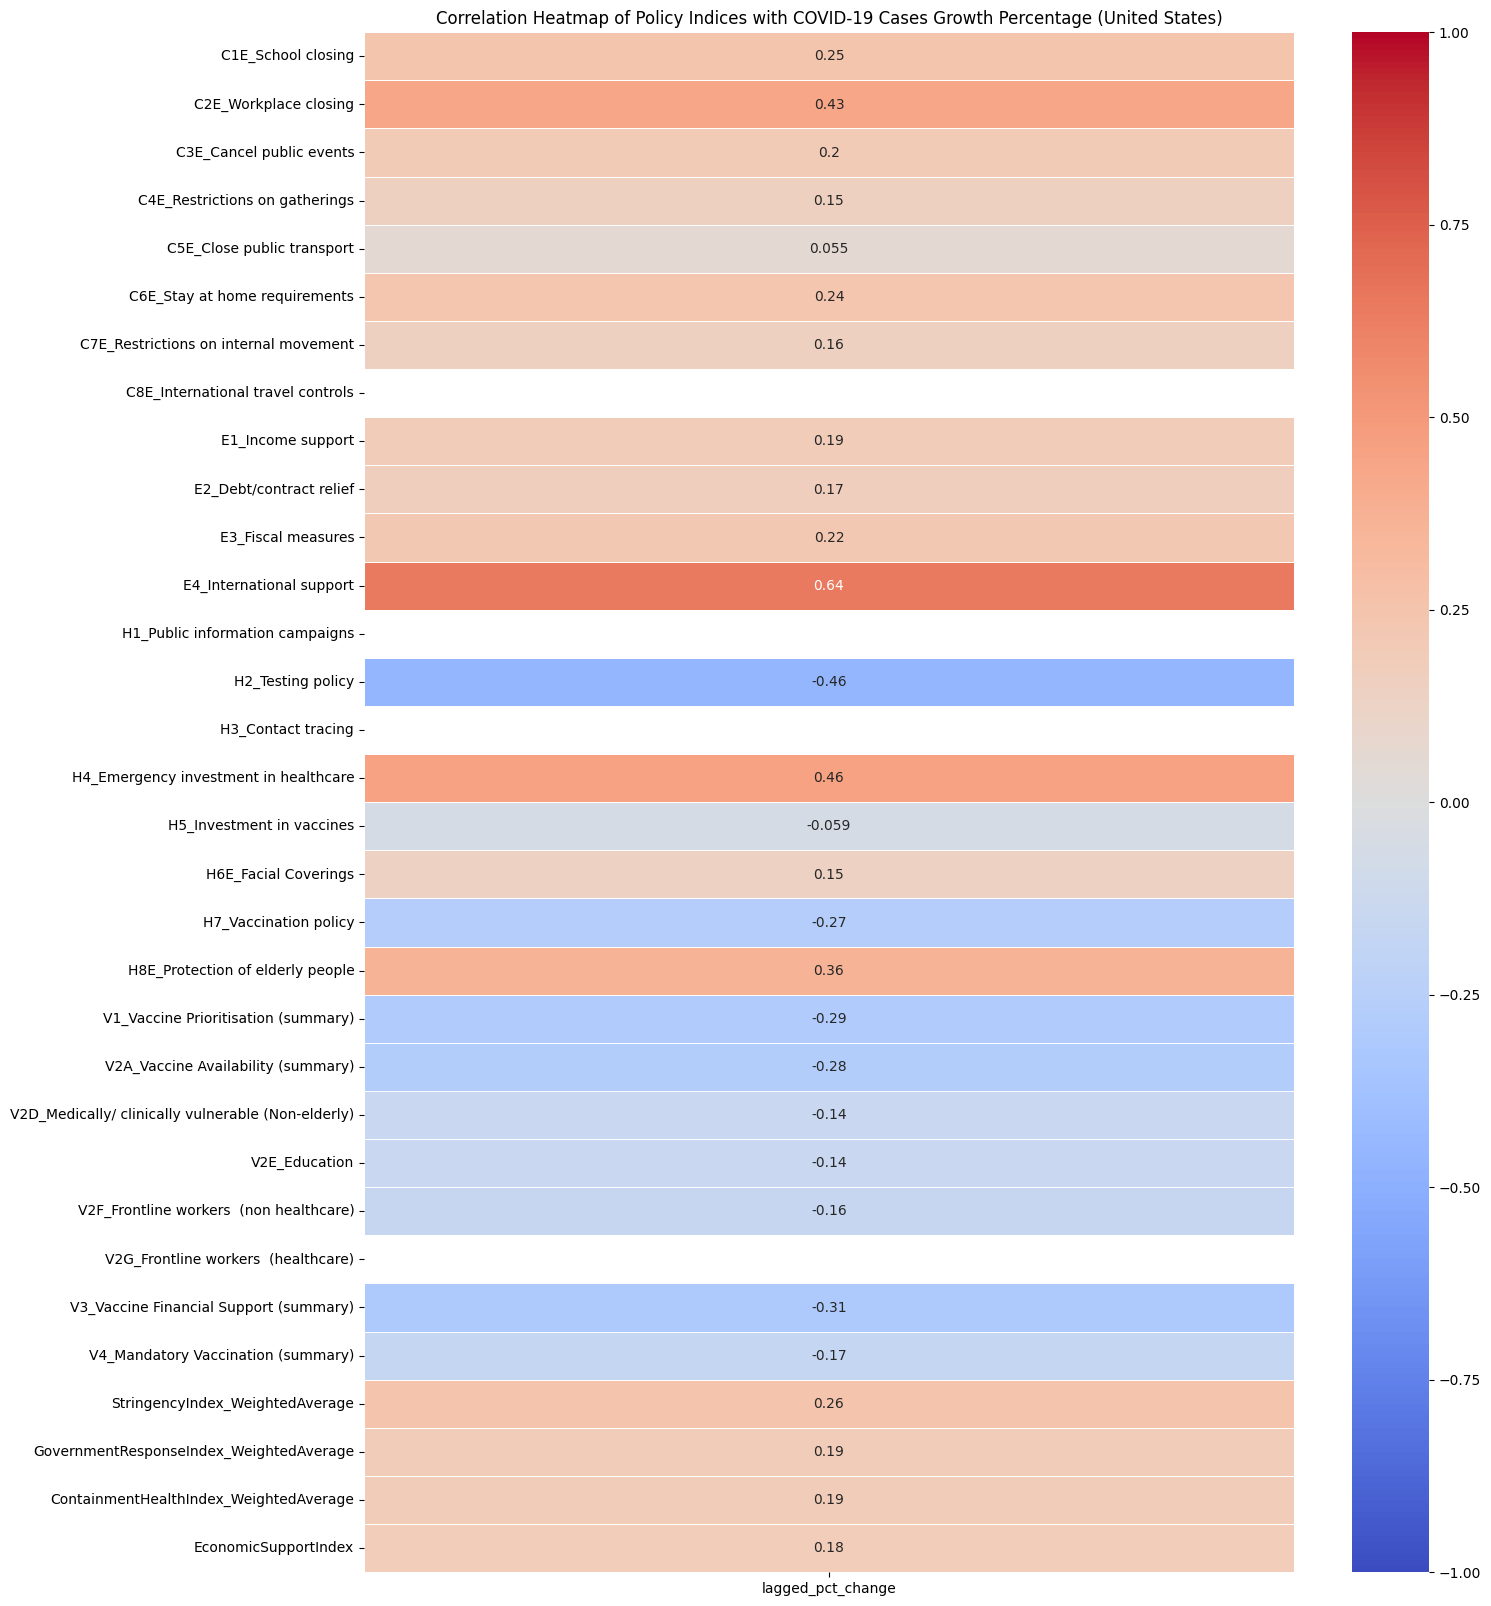

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_correlation_matrix(data, lag, country):
    # List of policy indices
    policy_indices = [
        "C1E_School closing",
        "C2E_Workplace closing",
        "C3E_Cancel public events",
        "C4E_Restrictions on gatherings",
        "C5E_Close public transport",
        "C6E_Stay at home requirements",
        "C7E_Restrictions on internal movement",
        "C8E_International travel controls",
        "E1_Income support",
        "E2_Debt/contract relief",
        "E3_Fiscal measures",
        "E4_International support",
        "H1_Public information campaigns",
        "H2_Testing policy",
        "H3_Contact tracing",
        "H4_Emergency investment in healthcare",
        "H5_Investment in vaccines",
        "H6E_Facial Coverings",
        "H7_Vaccination policy",
        "H8E_Protection of elderly people",
        "V1_Vaccine Prioritisation (summary)",
        "V2A_Vaccine Availability (summary)",
        "V2D_Medically/ clinically vulnerable (Non-elderly)",
        "V2E_Education",
        "V2F_Frontline workers  (non healthcare)",
        "V2G_Frontline workers  (healthcare)",
        "V3_Vaccine Financial Support (summary)",
        "V4_Mandatory Vaccination (summary)",
        "StringencyIndex_WeightedAverage",
        "GovernmentResponseIndex_WeightedAverage",
        "ContainmentHealthIndex_WeightedAverage",
        "EconomicSupportIndex",
    ]

    data["lagged_pct_change"] = data["pct_change"].shift(lag)

    # Outcome columns
    outcome_columns = ["lagged_pct_change"]

    # Calculate the correlation matrix
    correlation_matrix = data[policy_indices + outcome_columns].corr()

    # Extract correlations between policy indices and outcome measures
    correlation_results = correlation_matrix.loc[policy_indices, outcome_columns]

    # Plot the heatmap
    plt.figure(figsize=(15, 20))
    sns.heatmap(correlation_results, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title(f"Correlation Heatmap of Policy Indices with COVID-19 Cases Growth Percentage ({country})")
    plt.show()


lags = [0, 1, 3, 5, 7]
for l in lags:
    plot_correlation_matrix(canada_weekly_merged_df, l, "Canada")
    plot_correlation_matrix(us_weekly_merged_df, l, "United States")

In [263]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarimax_analysis(df, column):
    df[column] = df[column].shift(1)
    df.dropna(subset=[column], inplace=True)

    exog_vars = df[[column]]  # Use lagged policy index

    # Determine ARIMA orders (p, d, q)
    # You can use auto_arima from pmdarima package or inspect ACF/PACF plots

    # For demonstration, let's assume (p=1, d=0, q=1)
    p, d, q = 3, 0, 3

    # Build the ARIMAX model using the full dataset
    model = SARIMAX(
        df["pct_change"],
        order=(p, d, q),
        exog=exog_vars,
        enforce_stationarity=False,
        enforce_invertibility=False,
    )

    # Fit the model
    results = model.fit(disp=False)

    # Print the summary of the model
    print(results.summary())

    # Extract the parameter estimate for the policy index
    policy_impact = results.params[column]
    print(f"Estimated impact of policy on case percentage change: {policy_impact}")

sarimax_analysis(weekly_merged_df, "StringencyIndex_WeightedAverage")


                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                   78
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -309.249
Date:                Tue, 05 Nov 2024   AIC                            634.498
Time:                        18:46:25   BIC                            652.931
Sample:                             0   HQIC                           641.851
                                 - 78                                         
Covariance Type:                  opg                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
StringencyIndex_WeightedAverage     0.0397      0.031      1.281      0.200      -0.021       0.100
ar.L1                               1.5144      0.441      3.437    

In [264]:
sarimax_analysis(weekly_merged_df, "ContainmentHealthIndex_WeightedAverage")


                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                   77
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -305.454
Date:                Tue, 05 Nov 2024   AIC                            626.907
Time:                        18:46:25   BIC                            645.231
Sample:                             0   HQIC                           634.210
                                 - 77                                         
Covariance Type:                  opg                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
ContainmentHealthIndex_WeightedAverage     0.0266      0.025      1.073      0.283      -0.022       0.075
ar.L1                                      1.14

In [265]:
sarimax_analysis(weekly_merged_df, "EconomicSupportIndex")

                               SARIMAX Results                                
Dep. Variable:             pct_change   No. Observations:                   76
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -300.547
Date:                Tue, 05 Nov 2024   AIC                            617.093
Time:                        18:46:25   BIC                            635.306
Sample:                             0   HQIC                           624.344
                                 - 76                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
EconomicSupportIndex     0.0513      0.030      1.719      0.086      -0.007       0.110
ar.L1                    1.1659      0.389      2.994      0.003       0.403       1.929
ar.L2       